<h1>A study on Airbnb Listings in Boston and Seattle</h1>
<h2>Questions of Interest</h2>
<ol>
<li>Most expansive month to visit either of the cities?</li>
<li>Most and least expensive neighbourhoods in the two cities?</li>
<li>The top features affecting the price of the listings?</li>
</ol>

<h2>Dataset resource</h2>
<p>The data can be found through the following links:</p>

[Seattle AirBNB Data](https://www.kaggle.com/airbnb/seattle/data)
and
[Boston AirBNB Data](https://www.kaggle.com/airbnb/seattle/data)
The airbnb data for both cities consists of the following files:
<ol>
<li>listings: Detailed listings</li>
<li>calendar: Detailed calendar data for the listings.</li>
<li>reviews: Guest's reviews for each of their stays.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import time
import math
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.model_selection import GridSearchCV


<h2> Data Understanding </h2>

In [2]:
listings_Boston = pd.read_csv("Boston/listings.csv")
listings_Seattle = pd.read_csv("Seattle/listings.csv")
calendar_Boston = pd.read_csv("Boston/calendar.csv")
calendar_Seattle = pd.read_csv("Seattle/calendar.csv")

<h3> Boston Dataset </h3>

In [3]:
listings_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
listings_Boston.shape[0]

3585

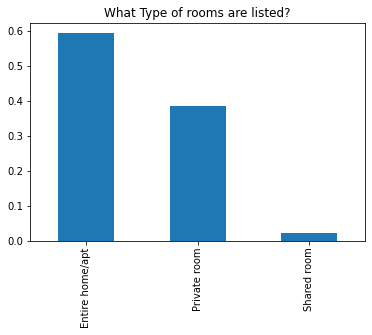

In [5]:
room_type = listings_Boston.room_type.value_counts()
room_type
(room_type/listings_Boston.shape[0]).plot(kind="bar");
plt.title("What Type of rooms are listed?");

In [6]:
room_type/listings_Boston.shape[0]

Entire home/apt    0.593305
Private room       0.384379
Shared room        0.022315
Name: room_type, dtype: float64

In [7]:
listings_Boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
def clean_price(x):
    """
    input = the string values with the $
    output = return a float values with eliminated $
    """
    try:
        if ',' in x:
            x = x.replace(',','')
        x = x[1:]
        return float(str(x))
    except:
        return x

In [9]:
#clean the price column by eliminate the $
listings_Boston['price'] = listings_Boston.price.apply(lambda x: clean_price(x))

In [10]:
listings_Boston.price.mean()

173.9258019525802

In [11]:
# columns with no missing values
set(listings_Boston.columns[listings_Boston.isnull().mean()== 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [12]:
# columns with more than 75% missing values
set(listings_Boston.columns[listings_Boston.isnull().mean()>0.5])

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

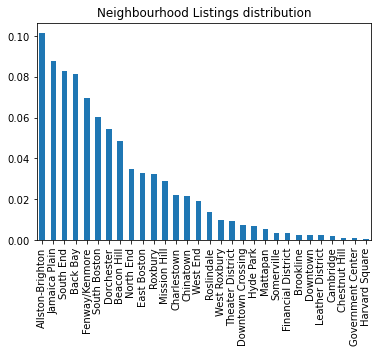

In [13]:
# neighbourhood distribution
neighbourhood_Boston = listings_Boston.neighbourhood.value_counts()
(neighbourhood_Boston/listings_Boston.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Listings distribution");

In [14]:
listings_Boston.price.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [15]:
w = 100
n = math.ceil((listings_Boston.price.max() - listings_Boston.price.min())/w)

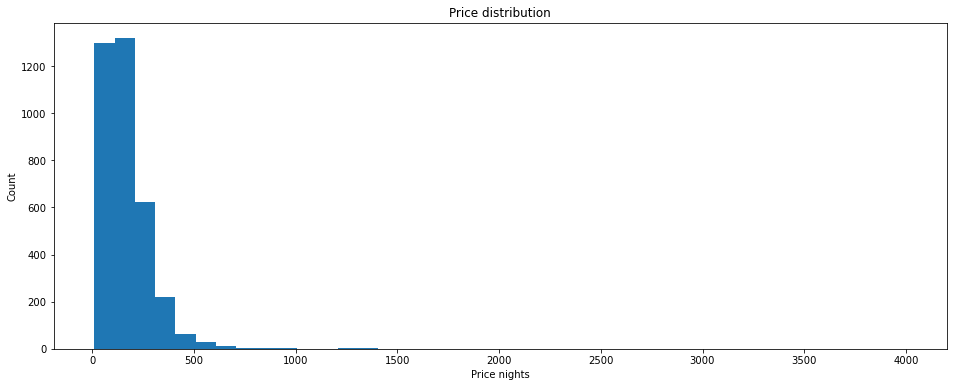

In [16]:
# price distribution
fig = plt.figure(figsize=(16,6))
plt.title('Price distribution');
ax = plt.hist(listings_Boston.price, bins = n)
plt.xlabel('Price nights');
plt.ylabel('Count');


In [17]:
# drop the missing values in price and drop 
calendar_Boston = calendar_Boston.dropna(subset=['price'], axis = 0)
calendar_Boston.info(verbose=True, null_counts=True)
calendar_Boston.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  643037 non-null  int64 
 1   date        643037 non-null  object
 2   available   643037 non-null  object
 3   price       643037 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.5+ MB


<ipython-input-17-27ff271cf545>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  calendar_Boston.info(verbose=True, null_counts=True)


,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [18]:
calendar_Boston.info(verbose=True)
calendar_Boston.price.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  643037 non-null  int64 
 1   date        643037 non-null  object
 2   available   643037 non-null  object
 3   price       643037 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.5+ MB


$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$1,132.00        1
$2,080.00        1
$1,728.00        1
$2,088.00        1
$1,089.00        1
Name: price, Length: 1246, dtype: int64

In [19]:
calendar_Boston['price'] = calendar_Boston.price.apply(lambda x: clean_price(x))

In [20]:
w = 100
n = math.ceil((calendar_Boston.price.max() - calendar_Boston.price.min())/w)

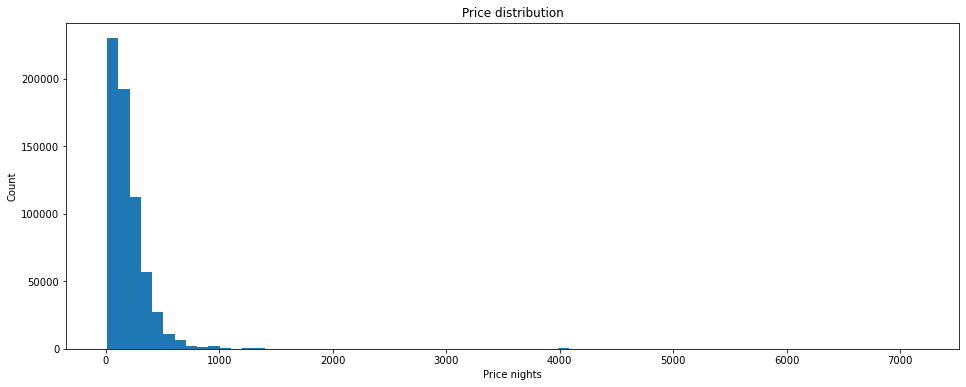

In [21]:
fig = plt.figure(figsize=(16,6))
plt.title('Price distribution');
ax = plt.hist(calendar_Boston.price, bins = n)
plt.xlabel('Price nights');
plt.ylabel('Count');

In [22]:
# columns with no missing values
set(calendar_Boston.columns[calendar_Boston.isnull().mean()== 0])

{'available', 'date', 'listing_id', 'price'}

In [23]:
# columns with no missing values
set(calendar_Boston.columns[calendar_Boston.isnull().mean()== 0])

{'available', 'date', 'listing_id', 'price'}

In [24]:
listings_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<h4> Data Wrangling </h4>

In [25]:
calendar_Boston['date'] = pd.to_datetime(calendar_Boston['date'], errors='coerce')
calendar_Boston['month'], calendar_Boston['year'] = calendar_Boston.date.dt.month, calendar_Boston.date.dt.year
calendar_Boston.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  object        
 3   price       643037 non-null  float64       
 4   month       643037 non-null  int64         
 5   year        643037 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 34.3+ MB


<ipython-input-25-f186fe7da7af>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  calendar_Boston.info(verbose=True, null_counts=True)


In [26]:
calendar_Boston.available.value_counts()

t    643037
Name: available, dtype: int64

In [27]:

not_available_mask = calendar_Boston.available=='f'
available_mask = calendar_Boston.available=='t'

In [28]:

calendar_Boston.groupby(['month','available']).mean()['price']

month  available
1      t            182.799671
2      t            180.961028
3      t            181.818742
4      t            197.252890
5      t            193.712295
6      t            196.535302
7      t            202.486309
8      t            203.330142
9      t            237.047727
10     t            233.416248
11     t            202.924416
12     t            192.601915
Name: price, dtype: float64

In [29]:
# number of available homes 
avaliable_home_count = calendar_Boston.groupby('date').count()[['price']]
avaliable_home_count = avaliable_home_count.rename({'price':"total_available_houses"}, axis=1)

In [30]:
avaliable_count_daily = calendar_Boston[available_mask].groupby('date').count()[['price']]
avaliable_count_daily = avaliable_count_daily.rename({"price":"total_available_houses"},axis='columns')

In [31]:
average_price_daily = calendar_Boston[available_mask].groupby('date').mean()[['price']]
# change column name
average_price_daily = average_price_daily.rename({"price":"average_prices"},axis='columns')

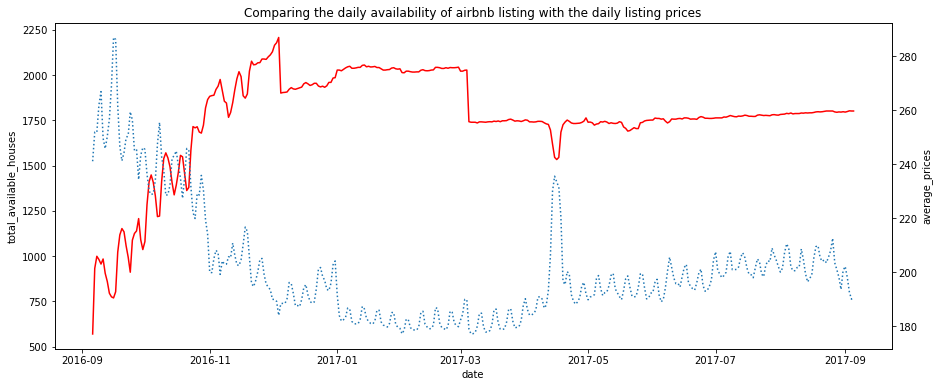

In [32]:

# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_daily.index,y = 'total_available_houses', 
                  data = avaliable_count_daily,color="r",legend=False)

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_daily.index,y = 'average_prices',
             data=average_price_daily,ax=ax2,linestyle=':', legend=False)
ax.set_title('Comparing the daily availability of airbnb listing with the daily listing prices');

In [33]:
average_price_monthly = calendar_Boston[available_mask].groupby('month').mean()[['price']]
average_price_monthly = average_price_monthly.rename({"price":"monthly_average_prices"},axis='columns')

In [34]:

avaliable_count_monthly = calendar_Boston[available_mask].groupby('month').count()[['price']]
avaliable_count_monthly = avaliable_count_monthly.rename({"price":"total_available_houses_monthly"},axis='columns')

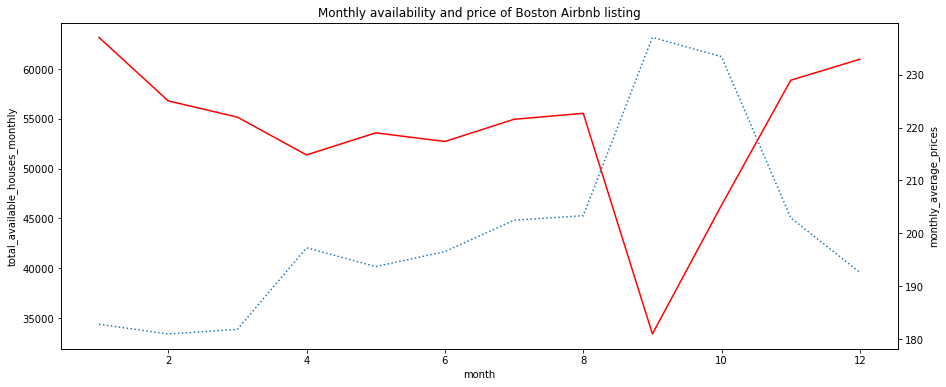

In [35]:
# plot total available houses and average monthly prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_monthly.index,y = 'total_available_houses_monthly', 
                  data = avaliable_count_monthly,color="r",legend=False)
ax.set_xticks
ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_monthly.index,y = 'monthly_average_prices',
             data=average_price_monthly,ax=ax2,linestyle=':', legend=False)
ax.set_title('Monthly availability and price of Boston Airbnb listing');



In [36]:
listings_Boston.price

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [37]:
listings_Boston['price'] = listings_Boston.price.apply(lambda x: clean_price(x))
listings_Boston.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

<ipython-input-37-caf83091b19a>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  listings_Boston.info(verbose=True, null_counts=True)


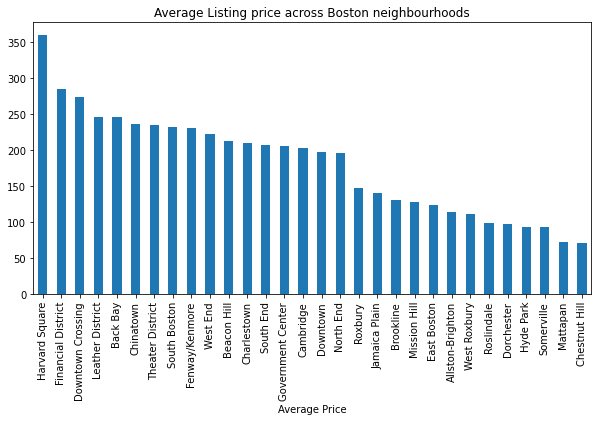

In [38]:
# grouped neighbourhood 
(listings_Boston.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(10,5));
plt.title("Average Listing price across Boston neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

In [39]:
listings_Boston['security_deposit'] = listings_Boston['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
listings_Seattle['security_deposit'] = listings_Seattle['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
listings_Boston.security_deposit.fillna(0, inplace = True)
listings_Seattle.security_deposit.fillna(0, inplace = True)

In [40]:
listings_Boston.drop(['access', 'interaction', 'house_rules'], axis = 1, inplace = True)
    

In [41]:
listings_Boston.drop(['notes'], axis = 1, inplace = True)

<h3> Seattle Dataset </h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<ipython-input-42-f4e9e813eb78>:28: FutureWarning: null_counts is deprecated. Use show_counts instead
  calendar_Seattle.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


{'available', 'date', 'listing_id', 'price'}

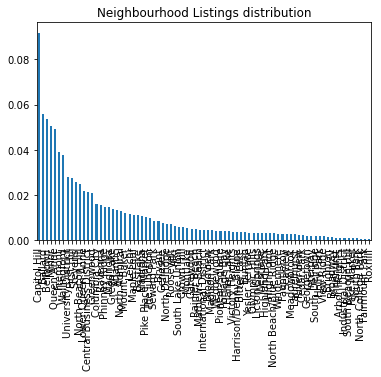

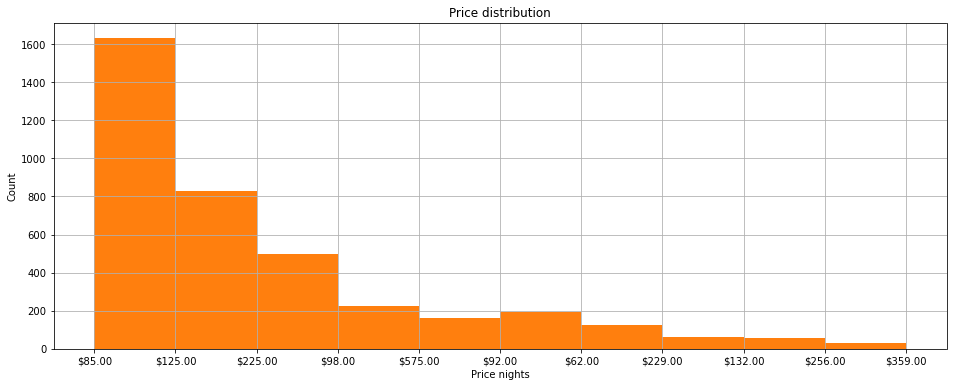

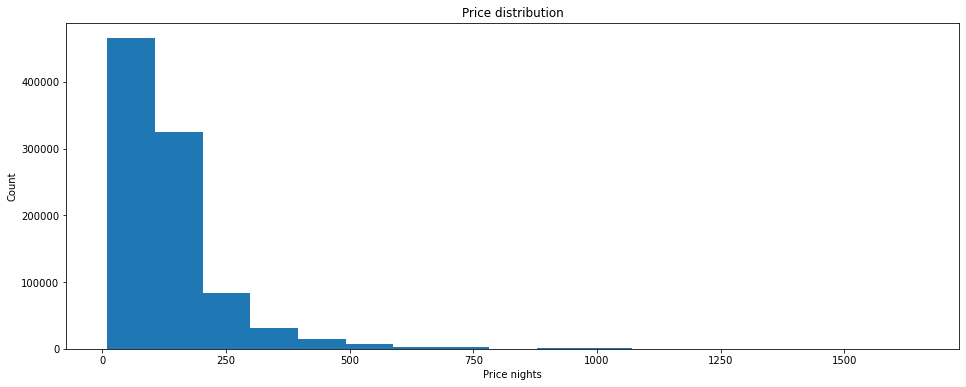

In [42]:
listings_Seattle.info()
listings_Seattle.shape[0]
set(listings_Seattle.columns[listings_Seattle.isnull().mean()== 0])

# columns with more than 75% missing values
set(listings_Seattle.columns[listings_Seattle.isnull().mean()>0.5])

# neighbourhood distribution
neighbourhood_Seattle = listings_Seattle.neighbourhood.value_counts()
(neighbourhood_Seattle/listings_Seattle.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Listings distribution");



# price distribution
fig = plt.figure(figsize=(16,6))
listings_Seattle.price.hist();
plt.title('Price distribution');
#plt.xticks(rotation=90)
n, bins, patches = plt.hist(listings_Seattle.price)
plt.xticks(bins)
plt.xlabel('Price nights');
plt.ylabel('Count');


# drop the missing values in price and drop 
calendar_Seattle = calendar_Seattle.dropna(subset=['price'], axis = 0)
calendar_Seattle.info(verbose=True, null_counts=True)
calendar_Seattle.head()

calendar_Seattle.info(verbose=True)

calendar_Seattle['price'] = calendar_Seattle.price.apply(lambda x: clean_price(x))


w = 100
n = math.ceil((calendar_Seattle.price.max() - calendar_Seattle.price.min())/w)
fig = plt.figure(figsize=(16,6))
plt.title('Price distribution');
#plt.xticks(rotation=90)

#n, bins, patches = plt.hist(calendar_Boston.price)

ax = plt.hist(calendar_Seattle.price, bins = n)

#plt.xticks(bins)
plt.xlabel('Price nights');
plt.ylabel('Count');

# columns with no missing values
set(calendar_Seattle.columns[calendar_Seattle.isnull().mean()== 0])

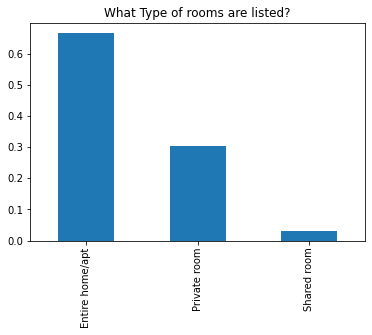

In [43]:
room_type = listings_Seattle.room_type.value_counts()
room_type
(room_type/listings_Seattle.shape[0]).plot(kind="bar");
plt.title("What Type of rooms are listed?");

In [44]:
room_type/listings_Seattle.shape[0]
listings_Seattle['price'] = listings_Seattle.price.apply(lambda x: clean_price(x))
listings_Seattle.price.mean()

127.97616553169199

<h4> Data Wrangling </h4>

<ipython-input-45-13c379ed7fdc>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  calendar_Seattle.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
 4   month       934542 non-null  int64         
 5   year        934542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 49.9+ MB


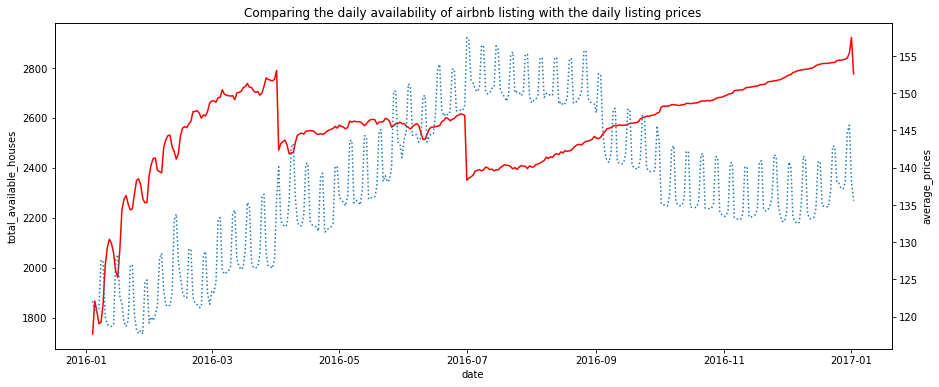

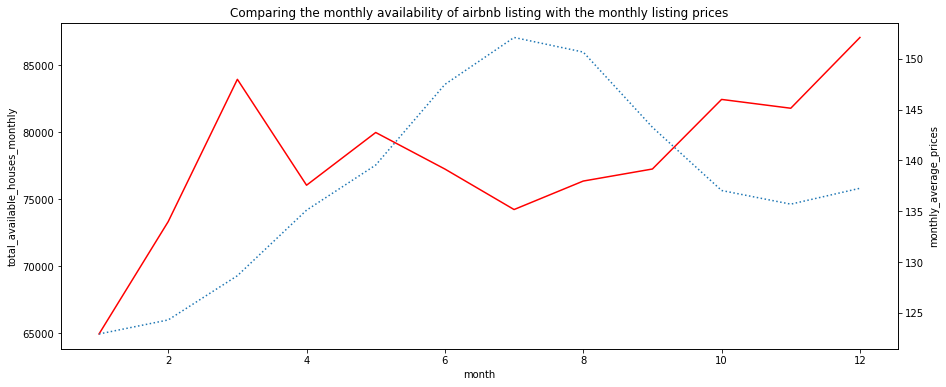

In [45]:
calendar_Seattle['date'] = pd.to_datetime(calendar_Seattle['date'], errors='coerce')
calendar_Seattle['month'], calendar_Seattle['year'] = calendar_Seattle.date.dt.month, calendar_Seattle.date.dt.year
calendar_Seattle.info(verbose=True, null_counts=True)


not_available_mask = calendar_Seattle.available=='f'
available_mask = calendar_Seattle.available=='t'
calendar_Seattle.groupby(['month','available']).mean()['price']

# number of available homes 
avaliable_home_count = calendar_Seattle.groupby('date').count()[['price']]
avaliable_home_count = avaliable_home_count.rename({'price':"total_available_houses"}, axis=1)


avaliable_count_daily = calendar_Seattle[available_mask].groupby('date').count()[['price']]
avaliable_count_daily = avaliable_count_daily.rename({"price":"total_available_houses"},axis='columns')

average_price_daily = calendar_Seattle[available_mask].groupby('date').mean()[['price']]
# change column name
average_price_daily = average_price_daily.rename({"price":"average_prices"},axis='columns')


# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_daily.index,y = 'total_available_houses', 
                  data = avaliable_count_daily,color="r",legend=False)

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_daily.index,y = 'average_prices',
             data=average_price_daily,ax=ax2,linestyle=':', legend=False)
ax.set_title('Comparing the daily availability of airbnb listing with the daily listing prices');

average_price_monthly = calendar_Seattle[available_mask].groupby('month').mean()[['price']]
average_price_monthly = average_price_monthly.rename({"price":"monthly_average_prices"},axis='columns')



avaliable_count_monthly = calendar_Seattle[available_mask].groupby('month').count()[['price']]
avaliable_count_monthly = avaliable_count_monthly.rename({"price":"total_available_houses_monthly"},axis='columns')

# plot total available houses and average monthly prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_monthly.index,y = 'total_available_houses_monthly', 
                  data = avaliable_count_monthly,color="r",legend=False)
ax.set_xticks
ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_monthly.index,y = 'monthly_average_prices',
             data=average_price_monthly,ax=ax2,linestyle=':', legend=False)
ax.set_title('Comparing the monthly availability of airbnb listing with the monthly listing prices');



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


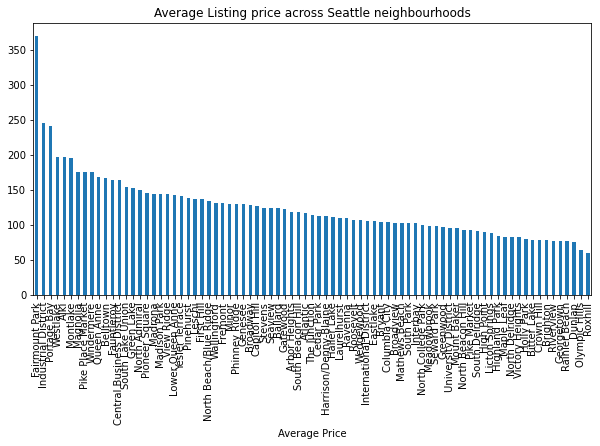

In [46]:
# grouped neighbourhood 
(listings_Seattle.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(10,5));
plt.title("Average Listing price across Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

listings_Boston['security_deposit'] = listings_Boston['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
listings_Seattle['security_deposit'] = listings_Seattle['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
listings_Boston.security_deposit.fillna(0, inplace = True)
listings_Seattle.security_deposit.fillna(0, inplace = True)

#listings_Seattle.drop(['access', 'interaction', 'house_rules'], axis = 1, inplace = True)
listings_Seattle.drop(['notes'], axis = 1, inplace = True)

listings_Seattle[listings_Seattle['host_since'].apply(lambda x: isinstance(x, float))]
 

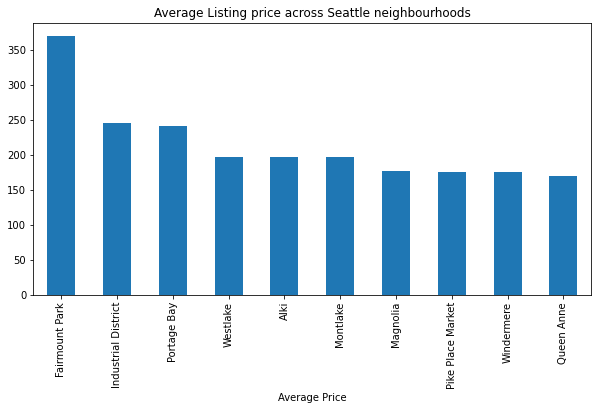

In [47]:
# grouped neighbourhood 
(listings_Seattle.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)).plot(kind="bar", figsize=(10,5));
plt.title("Average Listing price across Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

In [48]:
listings_Boston['amenities'][0]

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

<h5> Data Cleaning </h5>

In [49]:
listings_Boston.host_since

0       2015-04-15
1       2012-06-07
2       2009-05-11
3       2013-04-21
4       2014-05-11
           ...    
3580    2014-07-31
3581    2015-07-02
3582    2014-01-14
3583    2016-05-27
3584    2015-08-20
Name: host_since, Length: 3585, dtype: object

In [50]:
listings_Seattle.host_since

0       2011-08-11
1       2013-02-21
2       2014-06-12
3       2013-11-06
4       2011-11-29
           ...    
3813    2015-04-13
3814    2015-10-14
3815    2015-12-30
3816    2015-01-03
3817    2014-04-25
Name: host_since, Length: 3818, dtype: object

In [51]:
listings_Seattle[listings_Seattle['host_since'].apply(lambda x: isinstance(x, float))]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [52]:
listings_Seattle = listings_Seattle[listings_Seattle.id != 8354452]

In [53]:
listings_Seattle = listings_Seattle[listings_Seattle.id != 10235014]

In [54]:
#listings_Seattle.zipcode  
listings_Seattle = listings_Seattle[listings_Seattle.zipcode.str[:5] != '99\n98']

In [55]:
listings_Seattle[listings_Seattle['host_since'].apply(lambda x: isinstance(x, str))]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [56]:
# Preprocess the 'host_since' column
now = datetime.strptime('2018-09-19','%Y-%m-%d')
listings_Boston.host_since = listings_Boston.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)
        

In [57]:
listings_Seattle.host_since = listings_Seattle.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)


In [58]:
listings_Seattle.host_since

0       2596
1       2036
2       1560
3       1778
4       2486
        ... 
3813    1255
3814    1071
3815     994
3816    1355
3817    1608
Name: host_since, Length: 3815, dtype: int64

<h2> Prepare Data </h2>

In [59]:
def preparing(listings):
    '''
    input:
        listings: The listings dataset of target city.
    output:
        df2: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    '''

    # Plot the Ratio of missing data for all Column
    null_list = listings.isnull().sum()
    null_per = null_list / len(listings) * 100
    '''
    plt.figure(figsize=(15,5))
    plt.title('Distribution of the Ratio of Missing Data in Each Column')
    plt.hist(null_per, bins = np.linspace(10,100,50))
    plt.xlabel('Percentage of Missing Data')
    plt.ylabel('Count')
    plt.show()
    '''
    
    # Drop part of the columns with high ratio of missing data
    drop_index = null_per[null_per > 50].index
    listings.drop(drop_index, axis = 1, inplace = True)
    
    # Preprocess 'price' columns into numerical value
    if type(listings.price[0]) == str:
        listings.price = listings.price.apply(lambda x: float(x[1:].replace(',', '')))
    print(listings.price.describe())
    # Plot the distribution of price in Certain City
    plt.figure(figsize=(12,4))
    plt.title('Distribution of the Price')
    plt.hist(listings.price,bins = np.linspace(0,1000,100))
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
    # Drop large price rows and some other useless columns
    drop_price_index = listings[listings.price > 500].index
    listings.drop(drop_price_index, axis = 0, inplace = True)
    listings.drop(['space', 'neighborhood_overview', 'transit','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
               'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
              'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
               'host_id', 'neighbourhood', 'calendar_last_scraped', 'market'], axis = 1, inplace = True)
    

    
    # Take care of 'amenities' column (transfer into catagorical column)
    df = listings
    amenities = df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
    df['amenities'] = amenities
    possible_amenities = set([item for sublist in amenities for item in sublist])
    possible_amenities = list(possible_amenities)
    del possible_amenities[1]
    print("There are {} amenities in total.".format(len(possible_amenities)))
    mlb = MultiLabelBinarizer()
    amenities_result = pd.DataFrame(mlb.fit_transform(df['amenities']),columns=mlb.classes_, index=df.index)
    df2 = pd.concat([df, amenities_result], axis=1, sort = False)
    df2.drop(['amenities'], axis = 1, inplace = True)
    
    # Preprocess some other columns, convert into numerical value
    df2['cleaning_fee'] = df2['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
    df2['extra_people'] = df2['extra_people'].replace( '[$,]','', regex=True ).astype(float)
    
    df2['host_response_rate'] = df2['host_response_rate'].replace( '%','', regex=True ).astype(float)
    if type(df2.zipcode[0]) == str:
        df2.zipcode = df2.zipcode.str[:5].apply(lambda x: float(x))
    
    # Fill missing data
    df2.bathrooms.fillna(df2.groupby("bedrooms")["bathrooms"].transform("median"), inplace=True)
    df2.beds.fillna(df2.groupby("bedrooms")["beds"].transform("median"), inplace=True)
    df2.bedrooms.fillna(df2.groupby("bathrooms")["bedrooms"].transform("median"), inplace=True)
    #df2.security_deposit.fillna(0, inplace = True)
    df2.cleaning_fee.fillna(0, inplace = True)
    fillmean_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                     'review_scores_location', 'review_scores_value', 'reviews_per_month']
    for col in fillmean_list:
        df2[col].fillna(df[col].mean(), inplace = True)
    df2['host_response_rate'].fillna(df2.host_response_rate.mean(), inplace = True)   
    df2.zipcode.fillna(listings_Boston.groupby('neighbourhood_cleansed')['zipcode'].apply(lambda x: x.fillna(x.value_counts().index[0])), inplace = True)
    
    # One-hot encoding the whole dataframe
    df2 = pd.get_dummies(df2)
    price_raw = df2['price']
    df2 = df2.drop('price', axis = 1)
    
    # Use MinMax to process some of the numerical data
    scaler = MinMaxScaler()
    numerical = ['host_since', 'latitude', 'longitude', 'review_scores_rating']
    df2[numerical] = scaler.fit_transform(df2[numerical])
    return df2, price_raw, possible_amenities

In [60]:
def training(df2, price_raw, possible_amenities):
    '''
    input:
        df2: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    output:
        None
    '''

    # Split the preprocessed dataset into train/test dataset
    X_train, X_test, y_train, y_test = train_test_split(df2, price_raw, test_size = 0.2, random_state = 0)
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))


    # Grid Search to find Best Parameter
    param_grid = {
                'bootstrap': [True],
                'max_depth': [8, 10, 12, 14],
                'max_features': [500],
                'min_samples_leaf': [4, 5, 6],
                'min_samples_split': [3,5, 7, 10],
                'n_estimators': [400, 500]
                }

    forest_reg = RandomForestRegressor()
    grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    y_pred = grid_search.predict(X_test)
    print("Error Score on Test Data: {}.".format(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))))
    # Plot Featrue Importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    features = sorted(zip(feature_importances, df2.columns), reverse=True)
    attribute = []
    coefficient = []
    for feature in features:
        attribute.append(feature[1]) 
        coefficient.append(feature[0])
    plt.figure(figsize=(12,4))
    plt.bar(attribute[:20], height=coefficient[:20])
    plt.xticks(rotation=90)
    plt.xlabel('feature')
    plt.ylabel('feature importance')
    plt.title('feature importance for the Top 20 features')
    plt.show()
    
    # Plot Amenity importance
    amenity= []
    amn_coef = []
    for feature in features:
        if feature[1] in possible_amenities:
            amenity.append(feature[1])
            amn_coef.append(feature[0])
    plt.figure(figsize=(8,4))
    plt.bar(amenity[:10], height=amn_coef[:10])
    plt.xticks(rotation = 90)
    plt.xlabel('amenity')
    plt.ylabel('amenity importance')
    plt.title('feature importance for the Top 10 amenities')
    plt.show()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


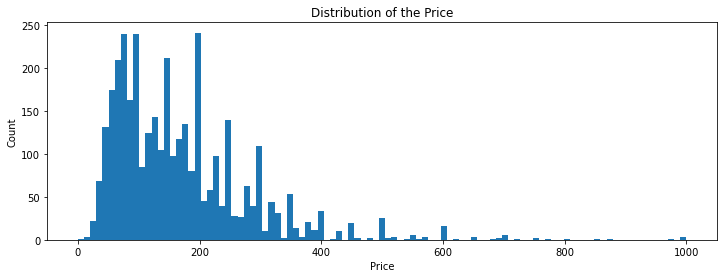

There are 45 amenities in total.
count    3815.000000
mean      127.967759
std        90.257267
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64


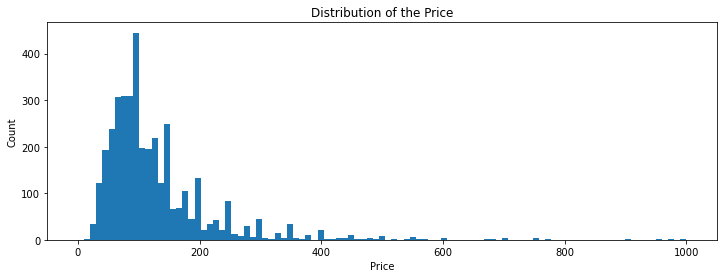

There are 41 amenities in total.


In [61]:

Boston, price_Boston, possible_amenities_Boston = preparing(listings_Boston)
Seattle, price_Seattle, possible_amenities_Seattle = preparing(listings_Seattle)

<h2> Data Modeling and Evaluation </h2>

Training set has 2815 samples.
Testing set has 704 samples.
{'bootstrap': True, 'max_depth': 14, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 400}
59.58679443922988 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 400}
59.63968568231202 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 500}
59.69757671604813 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
59.64806784837688 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
59.674424885204935 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 400}
59.613486092173694 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4,

Error Score on Test Data: 55.855826113590794.


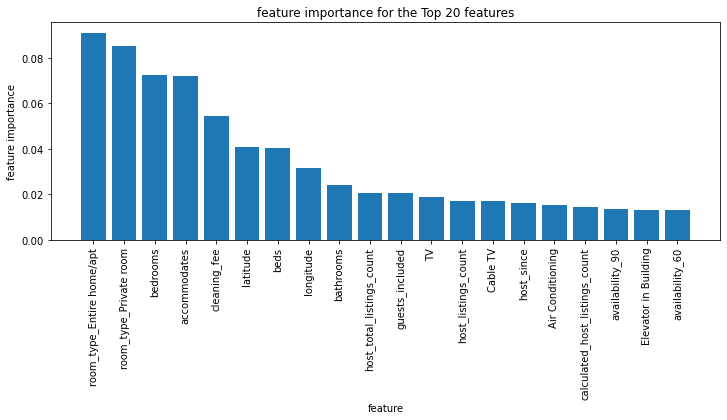

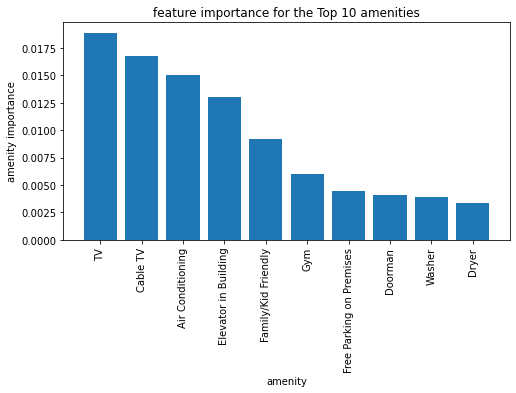

Training set has 3030 samples.
Testing set has 758 samples.
{'bootstrap': True, 'max_depth': 14, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 500}
48.744449439626095 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 400}
48.73408270226183 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 500}
48.68247112987553 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
48.67762555441167 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
48.749255311656384 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 400}
48.714024050001974 {'bootstrap': True, 'max_depth': 8, 'max_features': 500, 'min_samples_leaf': 4

Error Score on Test Data: 49.1888541731755.


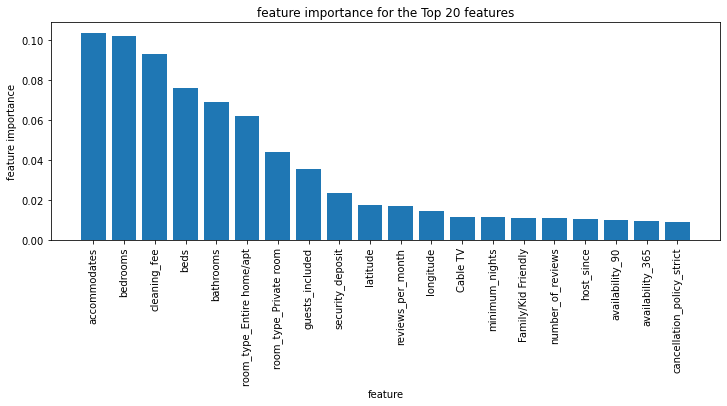

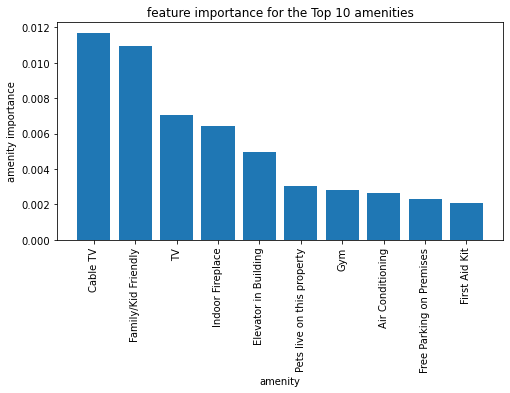

In [62]:
training(Boston, price_Boston, possible_amenities_Boston)
training(Seattle, price_Seattle, possible_amenities_Seattle)